# Credit Card Clustering

The aim of this project is to determine credit card user demographics via spending patterns. Target variables are not provided, so we will use clustering algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Import data
path = './Credit card data/CC General.csv'
cc_data = pd.read_csv(path)

In [3]:
cc_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There seem to be some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS, so let's look into that!

In [5]:
cc_data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [6]:
# Pull all numeric features
num_features = cc_data.select_dtypes(include=np.number).columns

In [7]:
# Let's impute data for instances with NaN values using the KNNImputer transformer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(cc_data[num_features]), columns=num_features)

Note that the dataset with imputed values only contains numeric features, leaving out CUST_ID

In [8]:
imp_data.describe().T
# Transpose the data because there are too many columns

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Let's look at a couple features:

(0.0, 10000.0)

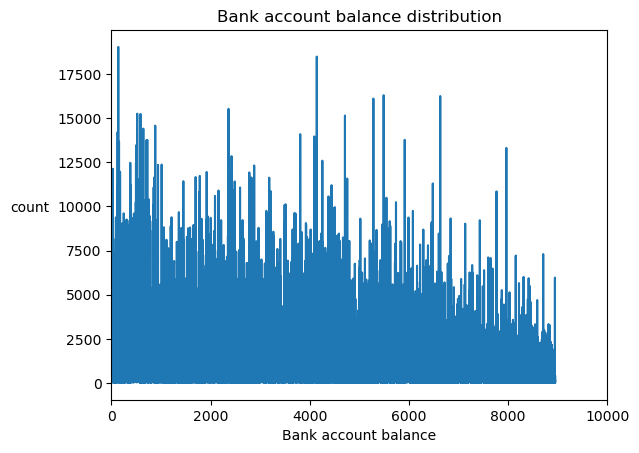

In [9]:
# Balance
plt.plot(imp_data.BALANCE)
plt.title("Bank account balance distribution")
plt.xlabel("Bank account balance")
plt.ylabel("count", rotation=0, labelpad=20)
plt.xlim(0, 10000)

We can observe a downwards sloping trend as bank account balance increases

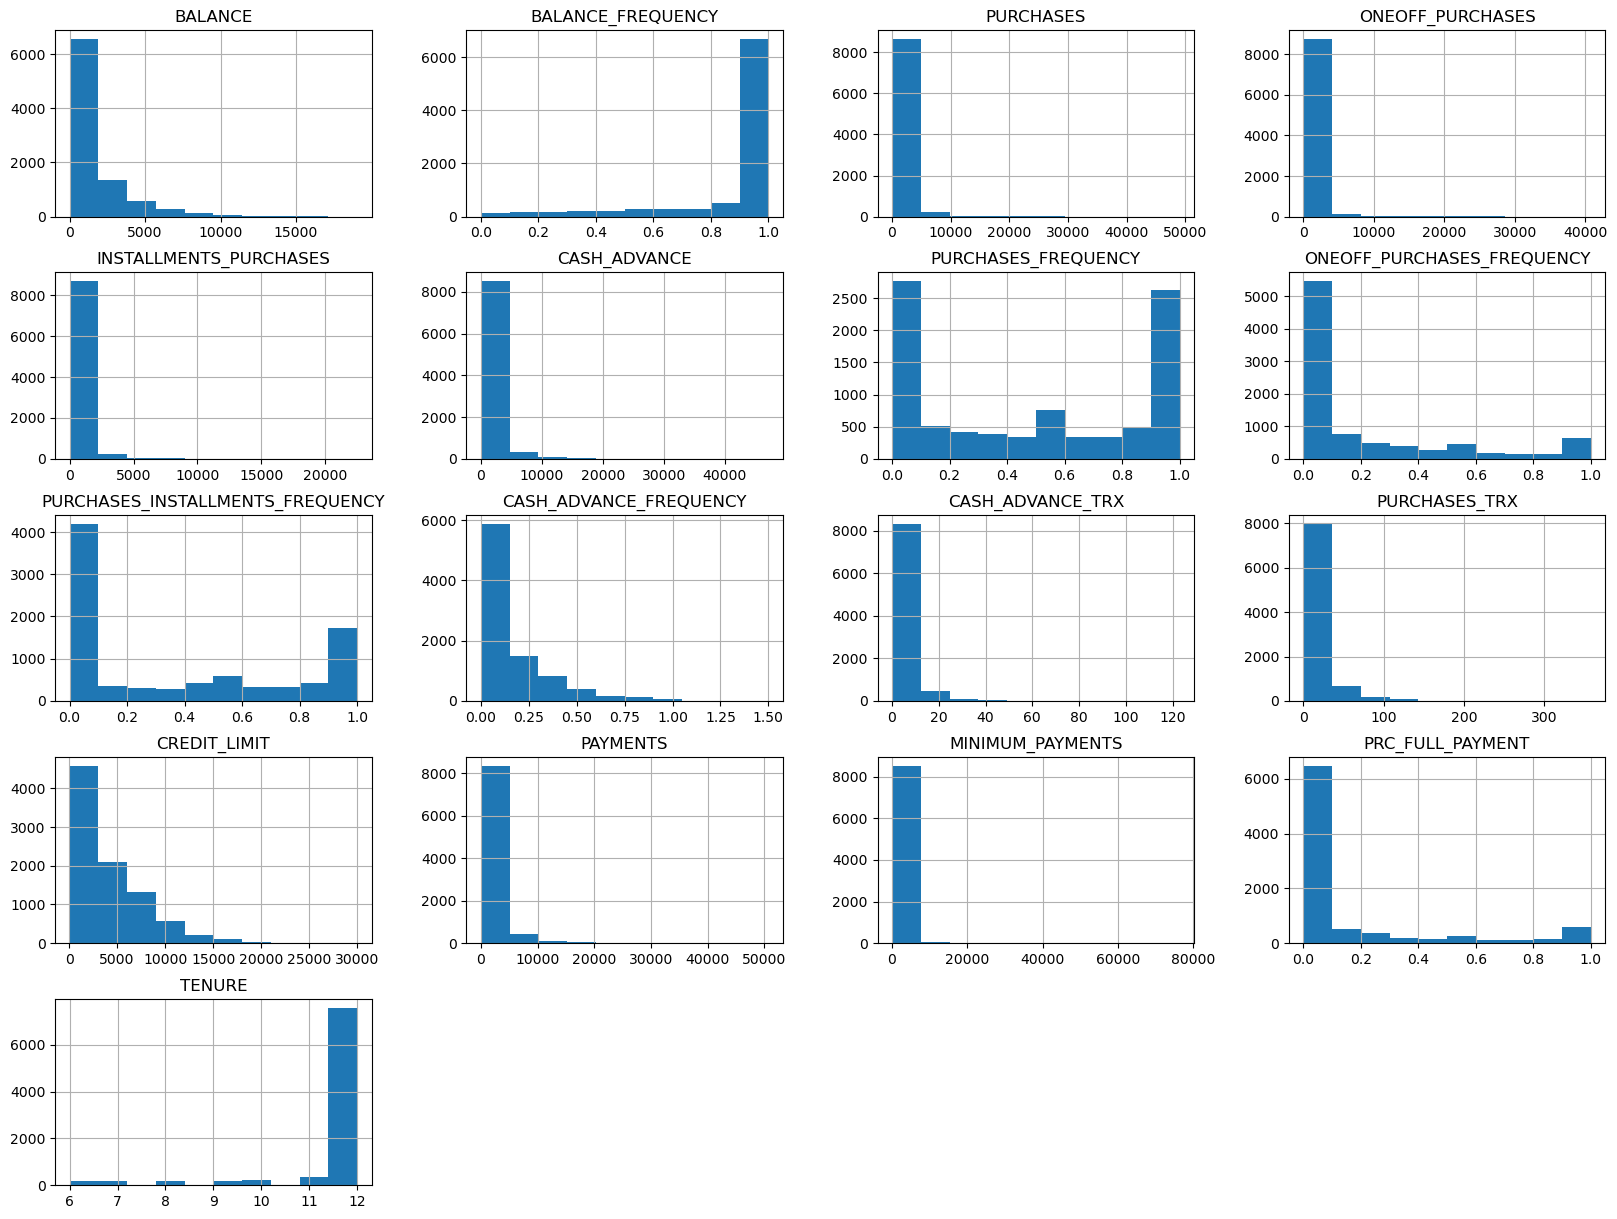

In [10]:
# Histogram
cc_data[num_features].hist(bins = 10, figsize=(20, 15), layout=(5, 4));

# Working with PyCaret

In [1]:
pip install pycaret

  Using cached pycaret-3.0.2-py3-none-any.whl (483 kB)
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pmdarima-2.0.3-cp310-cp310-macosx_11_0_arm64.whl (579 kB)
  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached plotly_resampler-0.8.3.2-cp310-cp310-macosx_13_0_arm64.whl
  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached dash-2.11.0-py3-none-any.whl (10.4 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      INFO:root:running bdist_wheel
      /Users/akilhuang/anaconda3/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      INF

In [4]:
conda activate pycaret_env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda init 

In [4]:
conda init bash

no change     /Users/akilhuang/anaconda3/condabin/conda
no change     /Users/akilhuang/anaconda3/bin/conda
no change     /Users/akilhuang/anaconda3/bin/conda-env
no change     /Users/akilhuang/anaconda3/bin/activate
no change     /Users/akilhuang/anaconda3/bin/deactivate
no change     /Users/akilhuang/anaconda3/etc/profile.d/conda.sh
no change     /Users/akilhuang/anaconda3/etc/fish/conf.d/conda.fish
no change     /Users/akilhuang/anaconda3/shell/condabin/Conda.psm1
no change     /Users/akilhuang/anaconda3/shell/condabin/conda-hook.ps1
no change     /Users/akilhuang/anaconda3/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /Users/akilhuang/anaconda3/etc/profile.d/conda.csh
modified      /Users/akilhuang/.bash_profile

==> For changes to take effect, close and re-open your current shell. <==


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret import *

ModuleNotFoundError: No module named 'pycaret'